In [1]:
import os
import keras
from keras import models, layers, regularizers
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from extract_features_c3d import C3D
from keras.models import model_from_json
from keras.models import load_model




Using TensorFlow backend.


In [18]:
def createX(inputPath):
    data = np.load(inputPath + '1.npy')
    listnpys = os.listdir(inputPath)
    for npys in listnpys:
        npy = np.load(inputPath + npys)
        data = np.vstack((data,npy))
        
    return data


def createY(r,c,val):
    return np.full((r,c), val)

In [36]:
'''
Turning the extracted features to training 

'''
# nude X
dataX1 = createX('./data_c3d/fnude_4096/')
# not nude X
dataX2 = createX('./data_c3d/fnnude_4096/')
new_dataX1 = np.hstack((dataX1, np.ones((dataX1.shape[0], 1))))
new_dataX2 = np.hstack((dataX2, np.zeros((dataX2.shape[0], 1))))
data = np.vstack((new_dataX1,new_dataX2))



In [7]:

from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)
#with open('./data_4096.npy', 'wb') as f:
           # np.save(f, data)


In [7]:
# loading saved Data
data = np.load('data_4096.npy')

In [9]:

X = data[:,:-1].astype(np.float32)
y = data[:,-1:].astype(np.float32)

In [11]:
X_train, X_test, y_train, y_test = train_test_split( data[:,:-1], data[:,-1:], test_size=0.22, random_state=42)


In [13]:
model = tf.keras.models.Sequential([
tf.keras.layers.Dense(1024, activation=tf.nn.relu),
tf.keras.layers.Dense(256, activation=tf.nn.relu),
tf.keras.layers.Dense(64, activation=tf.nn.relu),
tf.keras.layers.Dense(1,activation=tf.nn.sigmoid)
])

 

In [15]:
from keras import metrics
model.compile(optimizer='sgd',loss='mean_squared_error',  metrics=['mae','accuracy'])


In [16]:
history = model.fit(X_train, y_train,validation_split=0.33 ,epochs=100)

Instructions for updating:
Use tf.cast instead.


Train on 976 samples, validate on 481 samples


Instructions for updating:
Use tf.cast instead.


Epoch 1/100


 32/976 [..............................] - ETA: 15s - loss: 0.2450 - mean_absolute_error: 0.4913 - acc: 0.6875

 64/976 [>.............................] - ETA: 8s - loss: 0.2471 - mean_absolute_error: 0.4931 - acc: 0.5781 

 96/976 [=>............................] - ETA: 6s - loss: 0.2465 - mean_absolute_error: 0.4922 - acc: 0.5729

160/976 [===>..........................] - ETA: 3s - loss: 0.2438 - mean_absolute_error: 0.4891 - acc: 0.5750

224/976 [=====>........................] - ETA: 2s - loss: 0.2383 - mean_absolute_error: 0.4836 - acc: 0.5982

288/976 [=======>......................] - ETA: 2s - loss: 0.2358 - mean_absolute_error: 0.4809 - acc: 0.6250

352/976 [=========>....................] - ETA: 1s - loss: 0.2333 - mean_absolute_error: 0.4785 - acc: 0.6420

416/976 [===========>..................] - ETA: 1s - loss: 0.2323 - mean_absolute_error: 0.4773 - acc: 0.6490

480/976 [=============>................] - ETA: 1s - loss: 0.2294 - mean_absolute_error: 0.4744 - acc: 0.6625

544/976 [===============>..............] - ETA: 0s - loss: 0.2268 - mean_absolute_error: 0.4715 - acc: 0.6710

608/976 [=================>............] - ETA: 0s - loss: 0.2236 - mean_absolute_error: 0.4677 - acc: 0.6891

672/976 [===================>..........] - ETA: 0s - loss: 0.2216 - mean_absolute_error: 0.4651 - acc: 0.6964

736/976 [=====================>........] - ETA: 0s - loss: 0.2182 - mean_absolute_error: 0.4613 - acc: 0.7092

800/976 [=======================>......] - ETA: 0s - loss: 0.2156 - mean_absolute_error: 0.4583 - acc: 0.7225

864/976 [=========================>....] - ETA: 0s - loss: 0.2141 - mean_absolute_error: 0.4566 - acc: 0.7280

928/976 [===========================>..] - ETA: 0s - loss: 0.2108 - mean_absolute_error: 0.4525 - acc: 0.7403

976/976 [==============================] - 2s 2ms/sample - loss: 0.2090 - mean_absolute_error: 0.4503 - acc: 0.7469 - val_loss: 0.1785 - val_mean_absolute_error: 0.4111 - val_acc: 0.8316


Epoch 2/100
 32/976 [..............................] - ETA: 1s - loss: 0.1752 - mean_absolute_error: 0.4107 - acc: 0.8750

 64/976 [>.............................] - ETA: 1s - loss: 0.1647 - mean_absolute_error: 0.3970 - acc: 0.8906

 96/976 [=>............................] - ETA: 1s - loss: 0.1677 - mean_absolute_error: 0.4007 - acc: 0.8750

160/976 [===>..........................] - ETA: 1s - loss: 0.1642 - mean_absolute_error: 0.3962 - acc: 0.8938

224/976 [=====>........................] - ETA: 1s - loss: 0.1628 - mean_absolute_error: 0.3929 - acc: 0.8795

288/976 [=======>......................] - ETA: 0s - loss: 0.1591 - mean_absolute_error: 0.3885 - acc: 0.8854

352/976 [=========>....................] - ETA: 0s - loss: 0.1574 - mean_absolute_error: 0.3851 - acc: 0.8778

416/976 [===========>..................] - ETA: 0s - loss: 0.1562 - mean_absolute_error: 0.3827 - acc: 0.8774

480/976 [=============>................] - ETA: 0s - loss: 0.1556 - mean_absolute_error: 0.3815 - acc: 0.8750

544/976 [===============>..............] - ETA: 0s - loss: 0.1525 - mean_absolute_error: 0.3767 - acc: 0.8787

608/976 [=================>............] - ETA: 0s - loss: 0.1514 - mean_absolute_error: 0.3742 - acc: 0.8766

672/976 [===================>..........] - ETA: 0s - loss: 0.1504 - mean_absolute_error: 0.3718 - acc: 0.8765

736/976 [=====================>........] - ETA: 0s - loss: 0.1494 - mean_absolute_error: 0.3694 - acc: 0.8736

800/976 [=======================>......] - ETA: 0s - loss: 0.1474 - mean_absolute_error: 0.3664 - acc: 0.8763

864/976 [=========================>....] - ETA: 0s - loss: 0.1460 - mean_absolute_error: 0.3644 - acc: 0.8796

928/976 [===========================>..] - ETA: 0s - loss: 0.1451 - mean_absolute_error: 0.3628 - acc: 0.8793

976/976 [==============================] - 1s 1ms/sample - loss: 0.1444 - mean_absolute_error: 0.3614 - acc: 0.8791 - val_loss: 0.1366 - val_mean_absolute_error: 0.3420 - val_acc: 0.8711


Epoch 3/100


 32/976 [..............................] - ETA: 1s - loss: 0.0925 - mean_absolute_error: 0.2835 - acc: 0.9375

 96/976 [=>............................] - ETA: 0s - loss: 0.1071 - mean_absolute_error: 0.3055 - acc: 0.9271

160/976 [===>..........................] - ETA: 0s - loss: 0.1058 - mean_absolute_error: 0.3030 - acc: 0.9438

224/976 [=====>........................] - ETA: 0s - loss: 0.1120 - mean_absolute_error: 0.3090 - acc: 0.9241

288/976 [=======>......................] - ETA: 0s - loss: 0.1154 - mean_absolute_error: 0.3126 - acc: 0.9167

352/976 [=========>....................] - ETA: 0s - loss: 0.1138 - mean_absolute_error: 0.3106 - acc: 0.9119

416/976 [===========>..................] - ETA: 0s - loss: 0.1121 - mean_absolute_error: 0.3078 - acc: 0.9159

480/976 [=============>................] - ETA: 0s - loss: 0.1119 - mean_absolute_error: 0.3074 - acc: 0.9167

544/976 [===============>..............] - ETA: 0s - loss: 0.1113 - mean_absolute_error: 0.3060 - acc: 0.9173

608/976 [=================>............] - ETA: 0s - loss: 0.1109 - mean_absolute_error: 0.3047 - acc: 0.9161

672/976 [===================>..........] - ETA: 0s - loss: 0.1094 - mean_absolute_error: 0.3012 - acc: 0.9152

736/976 [=====================>........] - ETA: 0s - loss: 0.1109 - mean_absolute_error: 0.3027 - acc: 0.9090

800/976 [=======================>......] - ETA: 0s - loss: 0.1120 - mean_absolute_error: 0.3031 - acc: 0.9038

864/976 [=========================>....] - ETA: 0s - loss: 0.1114 - mean_absolute_error: 0.3020 - acc: 0.9051

928/976 [===========================>..] - ETA: 0s - loss: 0.1103 - mean_absolute_error: 0.3006 - acc: 0.9073

976/976 [==============================] - 1s 1ms/sample - loss: 0.1087 - mean_absolute_error: 0.2976 - acc: 0.9078 - val_loss: 0.1135 - val_mean_absolute_error: 0.2945 - val_acc: 0.8815


Epoch 4/100
 32/976 [..............................] - ETA: 0s - loss: 0.0640 - mean_absolute_error: 0.2335 - acc: 1.0000

 96/976 [=>............................] - ETA: 0s - loss: 0.0851 - mean_absolute_error: 0.2600 - acc: 0.9375

160/976 [===>..........................] - ETA: 0s - loss: 0.0925 - mean_absolute_error: 0.2679 - acc: 0.9312

224/976 [=====>........................] - ETA: 0s - loss: 0.0912 - mean_absolute_error: 0.2661 - acc: 0.9286

288/976 [=======>......................] - ETA: 0s - loss: 0.0854 - mean_absolute_error: 0.2562 - acc: 0.9410

352/976 [=========>....................] - ETA: 0s - loss: 0.0866 - mean_absolute_error: 0.2545 - acc: 0.9375

416/976 [===========>..................] - ETA: 0s - loss: 0.0868 - mean_absolute_error: 0.2557 - acc: 0.9351

480/976 [=============>................] - ETA: 0s - loss: 0.0862 - mean_absolute_error: 0.2532 - acc: 0.9312

544/976 [===============>..............] - ETA: 0s - loss: 0.0866 - mean_absolute_error: 0.2537 - acc: 0.9265

608/976 [=================>............] - ETA: 0s - loss: 0.0848 - mean_absolute_error: 0.2505 - acc: 0.9276

672/976 [===================>..........] - ETA: 0s - loss: 0.0869 - mean_absolute_error: 0.2538 - acc: 0.9226

736/976 [=====================>........] - ETA: 0s - loss: 0.0869 - mean_absolute_error: 0.2540 - acc: 0.9239

800/976 [=======================>......] - ETA: 0s - loss: 0.0873 - mean_absolute_error: 0.2543 - acc: 0.9225

864/976 [=========================>....] - ETA: 0s - loss: 0.0865 - mean_absolute_error: 0.2526 - acc: 0.9213

928/976 [===========================>..] - ETA: 0s - loss: 0.0871 - mean_absolute_error: 0.2539 - acc: 0.9192

976/976 [==============================] - 1s 1ms/sample - loss: 0.0878 - mean_absolute_error: 0.2547 - acc: 0.9180 - val_loss: 0.1036 - val_mean_absolute_error: 0.2649 - val_acc: 0.8732


Epoch 5/100
 32/976 [..............................] - ETA: 0s - loss: 0.1339 - mean_absolute_error: 0.2910 - acc: 0.7812

 96/976 [=>............................] - ETA: 0s - loss: 0.0874 - mean_absolute_error: 0.2456 - acc: 0.9167

160/976 [===>..........................] - ETA: 0s - loss: 0.0797 - mean_absolute_error: 0.2361 - acc: 0.9250

224/976 [=====>........................] - ETA: 0s - loss: 0.0808 - mean_absolute_error: 0.2344 - acc: 0.9152

288/976 [=======>......................] - ETA: 0s - loss: 0.0777 - mean_absolute_error: 0.2303 - acc: 0.9236

352/976 [=========>....................] - ETA: 0s - loss: 0.0762 - mean_absolute_error: 0.2295 - acc: 0.9318

416/976 [===========>..................] - ETA: 0s - loss: 0.0796 - mean_absolute_error: 0.2346 - acc: 0.9207

480/976 [=============>................] - ETA: 0s - loss: 0.0755 - mean_absolute_error: 0.2291 - acc: 0.9292

544/976 [===============>..............] - ETA: 0s - loss: 0.0764 - mean_absolute_error: 0.2298 - acc: 0.9246

608/976 [=================>............] - ETA: 0s - loss: 0.0773 - mean_absolute_error: 0.2313 - acc: 0.9243

672/976 [===================>..........] - ETA: 0s - loss: 0.0761 - mean_absolute_error: 0.2292 - acc: 0.9271

736/976 [=====================>........] - ETA: 0s - loss: 0.0756 - mean_absolute_error: 0.2288 - acc: 0.9293

800/976 [=======================>......] - ETA: 0s - loss: 0.0760 - mean_absolute_error: 0.2296 - acc: 0.9300

864/976 [=========================>....] - ETA: 0s - loss: 0.0756 - mean_absolute_error: 0.2290 - acc: 0.9306

928/976 [===========================>..] - ETA: 0s - loss: 0.0750 - mean_absolute_error: 0.2285 - acc: 0.9321

976/976 [==============================] - 1s 1ms/sample - loss: 0.0745 - mean_absolute_error: 0.2277 - acc: 0.9324 - val_loss: 0.0901 - val_mean_absolute_error: 0.2434 - val_acc: 0.9002


Epoch 6/100
 32/976 [..............................] - ETA: 0s - loss: 0.0664 - mean_absolute_error: 0.2089 - acc: 0.9062

 96/976 [=>............................] - ETA: 0s - loss: 0.0618 - mean_absolute_error: 0.2044 - acc: 0.9479

160/976 [===>..........................] - ETA: 0s - loss: 0.0632 - mean_absolute_error: 0.2054 - acc: 0.9375

224/976 [=====>........................] - ETA: 0s - loss: 0.0637 - mean_absolute_error: 0.2051 - acc: 0.9375

288/976 [=======>......................] - ETA: 0s - loss: 0.0632 - mean_absolute_error: 0.2048 - acc: 0.9410

352/976 [=========>....................] - ETA: 0s - loss: 0.0629 - mean_absolute_error: 0.2016 - acc: 0.9403

416/976 [===========>..................] - ETA: 0s - loss: 0.0629 - mean_absolute_error: 0.2011 - acc: 0.9423

480/976 [=============>................] - ETA: 0s - loss: 0.0635 - mean_absolute_error: 0.2030 - acc: 0.9438

544/976 [===============>..............] - ETA: 0s - loss: 0.0630 - mean_absolute_error: 0.2038 - acc: 0.9449

608/976 [=================>............] - ETA: 0s - loss: 0.0651 - mean_absolute_error: 0.2067 - acc: 0.9424

672/976 [===================>..........] - ETA: 0s - loss: 0.0649 - mean_absolute_error: 0.2063 - acc: 0.9420

736/976 [=====================>........] - ETA: 0s - loss: 0.0641 - mean_absolute_error: 0.2057 - acc: 0.9457

800/976 [=======================>......] - ETA: 0s - loss: 0.0641 - mean_absolute_error: 0.2057 - acc: 0.9438

832/976 [========================>.....] - ETA: 0s - loss: 0.0637 - mean_absolute_error: 0.2052 - acc: 0.9447

896/976 [==========================>...] - ETA: 0s - loss: 0.0636 - mean_absolute_error: 0.2051 - acc: 0.9453

960/976 [============================>.] - ETA: 0s - loss: 0.0641 - mean_absolute_error: 0.2054 - acc: 0.9427

976/976 [==============================] - 1s 1ms/sample - loss: 0.0642 - mean_absolute_error: 0.2058 - acc: 0.9416 - val_loss: 0.0815 - val_mean_absolute_error: 0.2276 - val_acc: 0.9064


Epoch 7/100


 32/976 [..............................] - ETA: 1s - loss: 0.0866 - mean_absolute_error: 0.2355 - acc: 0.9062

 96/976 [=>............................] - ETA: 1s - loss: 0.0635 - mean_absolute_error: 0.1979 - acc: 0.9375

160/976 [===>..........................] - ETA: 0s - loss: 0.0652 - mean_absolute_error: 0.2043 - acc: 0.9438

224/976 [=====>........................] - ETA: 0s - loss: 0.0667 - mean_absolute_error: 0.2048 - acc: 0.9420

288/976 [=======>......................] - ETA: 0s - loss: 0.0620 - mean_absolute_error: 0.1980 - acc: 0.9479

352/976 [=========>....................] - ETA: 0s - loss: 0.0576 - mean_absolute_error: 0.1908 - acc: 0.9517

416/976 [===========>..................] - ETA: 0s - loss: 0.0580 - mean_absolute_error: 0.1924 - acc: 0.9495

480/976 [=============>................] - ETA: 0s - loss: 0.0568 - mean_absolute_error: 0.1907 - acc: 0.9542

544/976 [===============>..............] - ETA: 0s - loss: 0.0568 - mean_absolute_error: 0.1907 - acc: 0.9540

608/976 [=================>............] - ETA: 0s - loss: 0.0548 - mean_absolute_error: 0.1881 - acc: 0.9589

672/976 [===================>..........] - ETA: 0s - loss: 0.0547 - mean_absolute_error: 0.1877 - acc: 0.9554

736/976 [=====================>........] - ETA: 0s - loss: 0.0561 - mean_absolute_error: 0.1894 - acc: 0.9538

800/976 [=======================>......] - ETA: 0s - loss: 0.0569 - mean_absolute_error: 0.1897 - acc: 0.9513

864/976 [=========================>....] - ETA: 0s - loss: 0.0561 - mean_absolute_error: 0.1878 - acc: 0.9525

928/976 [===========================>..] - ETA: 0s - loss: 0.0563 - mean_absolute_error: 0.1886 - acc: 0.9515

976/976 [==============================] - 1s 1ms/sample - loss: 0.0555 - mean_absolute_error: 0.1878 - acc: 0.9529 - val_loss: 0.0775 - val_mean_absolute_error: 0.2115 - val_acc: 0.9064


Epoch 8/100
 32/976 [..............................] - ETA: 0s - loss: 0.0344 - mean_absolute_error: 0.1363 - acc: 0.9688

 96/976 [=>............................] - ETA: 0s - loss: 0.0388 - mean_absolute_error: 0.1599 - acc: 0.9792

160/976 [===>..........................] - ETA: 0s - loss: 0.0447 - mean_absolute_error: 0.1682 - acc: 0.9750

224/976 [=====>........................] - ETA: 0s - loss: 0.0482 - mean_absolute_error: 0.1729 - acc: 0.9643

288/976 [=======>......................] - ETA: 0s - loss: 0.0501 - mean_absolute_error: 0.1768 - acc: 0.9583

352/976 [=========>....................] - ETA: 0s - loss: 0.0466 - mean_absolute_error: 0.1707 - acc: 0.9602

416/976 [===========>..................] - ETA: 0s - loss: 0.0482 - mean_absolute_error: 0.1735 - acc: 0.9591

480/976 [=============>................] - ETA: 0s - loss: 0.0483 - mean_absolute_error: 0.1750 - acc: 0.9625

544/976 [===============>..............] - ETA: 0s - loss: 0.0482 - mean_absolute_error: 0.1741 - acc: 0.9632

608/976 [=================>............] - ETA: 0s - loss: 0.0475 - mean_absolute_error: 0.1731 - acc: 0.9655

672/976 [===================>..........] - ETA: 0s - loss: 0.0472 - mean_absolute_error: 0.1711 - acc: 0.9658

736/976 [=====================>........] - ETA: 0s - loss: 0.0492 - mean_absolute_error: 0.1733 - acc: 0.9606

800/976 [=======================>......] - ETA: 0s - loss: 0.0474 - mean_absolute_error: 0.1702 - acc: 0.9638

864/976 [=========================>....] - ETA: 0s - loss: 0.0470 - mean_absolute_error: 0.1697 - acc: 0.9630

928/976 [===========================>..] - ETA: 0s - loss: 0.0489 - mean_absolute_error: 0.1724 - acc: 0.9591

976/976 [==============================] - 1s 1000us/sample - loss: 0.0486 - mean_absolute_error: 0.1718 - acc: 0.9600 - val_loss: 0.0694 - val_mean_absolute_error: 0.2035 - val_acc: 0.9231


Epoch 9/100
 32/976 [..............................] - ETA: 0s - loss: 0.0417 - mean_absolute_error: 0.1720 - acc: 1.0000

 96/976 [=>............................] - ETA: 0s - loss: 0.0510 - mean_absolute_error: 0.1810 - acc: 0.9688

160/976 [===>..........................] - ETA: 0s - loss: 0.0458 - mean_absolute_error: 0.1668 - acc: 0.9750

224/976 [=====>........................] - ETA: 0s - loss: 0.0495 - mean_absolute_error: 0.1685 - acc: 0.9688

288/976 [=======>......................] - ETA: 0s - loss: 0.0473 - mean_absolute_error: 0.1640 - acc: 0.9653

352/976 [=========>....................] - ETA: 0s - loss: 0.0482 - mean_absolute_error: 0.1655 - acc: 0.9631

416/976 [===========>..................] - ETA: 0s - loss: 0.0471 - mean_absolute_error: 0.1627 - acc: 0.9639

480/976 [=============>................] - ETA: 0s - loss: 0.0452 - mean_absolute_error: 0.1605 - acc: 0.9667

544/976 [===============>..............] - ETA: 0s - loss: 0.0448 - mean_absolute_error: 0.1607 - acc: 0.9688

608/976 [=================>............] - ETA: 0s - loss: 0.0445 - mean_absolute_error: 0.1613 - acc: 0.9704

672/976 [===================>..........] - ETA: 0s - loss: 0.0457 - mean_absolute_error: 0.1642 - acc: 0.9688

736/976 [=====================>........] - ETA: 0s - loss: 0.0453 - mean_absolute_error: 0.1643 - acc: 0.9688

800/976 [=======================>......] - ETA: 0s - loss: 0.0438 - mean_absolute_error: 0.1615 - acc: 0.9712

864/976 [=========================>....] - ETA: 0s - loss: 0.0432 - mean_absolute_error: 0.1613 - acc: 0.9722

928/976 [===========================>..] - ETA: 0s - loss: 0.0435 - mean_absolute_error: 0.1612 - acc: 0.9709

976/976 [==============================] - 1s 1ms/sample - loss: 0.0428 - mean_absolute_error: 0.1598 - acc: 0.9713 - val_loss: 0.0642 - val_mean_absolute_error: 0.1899 - val_acc: 0.9231


Epoch 10/100
 32/976 [..............................] - ETA: 0s - loss: 0.0267 - mean_absolute_error: 0.1380 - acc: 1.0000

 96/976 [=>............................] - ETA: 0s - loss: 0.0295 - mean_absolute_error: 0.1333 - acc: 0.9896

160/976 [===>..........................] - ETA: 0s - loss: 0.0307 - mean_absolute_error: 0.1338 - acc: 0.9812

224/976 [=====>........................] - ETA: 0s - loss: 0.0337 - mean_absolute_error: 0.1379 - acc: 0.9732

288/976 [=======>......................] - ETA: 0s - loss: 0.0359 - mean_absolute_error: 0.1433 - acc: 0.9722

352/976 [=========>....................] - ETA: 0s - loss: 0.0381 - mean_absolute_error: 0.1445 - acc: 0.9716

416/976 [===========>..................] - ETA: 0s - loss: 0.0364 - mean_absolute_error: 0.1428 - acc: 0.9760

480/976 [=============>................] - ETA: 0s - loss: 0.0363 - mean_absolute_error: 0.1424 - acc: 0.9771

544/976 [===============>..............] - ETA: 0s - loss: 0.0392 - mean_absolute_error: 0.1468 - acc: 0.9688

576/976 [================>.............] - ETA: 0s - loss: 0.0387 - mean_absolute_error: 0.1464 - acc: 0.9705

640/976 [==================>...........] - ETA: 0s - loss: 0.0388 - mean_absolute_error: 0.1478 - acc: 0.9703

704/976 [====================>.........] - ETA: 0s - loss: 0.0388 - mean_absolute_error: 0.1478 - acc: 0.9702

768/976 [======================>.......] - ETA: 0s - loss: 0.0390 - mean_absolute_error: 0.1480 - acc: 0.9688

832/976 [========================>.....] - ETA: 0s - loss: 0.0381 - mean_absolute_error: 0.1473 - acc: 0.9712

864/976 [=========================>....] - ETA: 0s - loss: 0.0384 - mean_absolute_error: 0.1476 - acc: 0.9711

928/976 [===========================>..] - ETA: 0s - loss: 0.0385 - mean_absolute_error: 0.1479 - acc: 0.9698

976/976 [==============================] - 1s 1ms/sample - loss: 0.0380 - mean_absolute_error: 0.1475 - acc: 0.9703 - val_loss: 0.0598 - val_mean_absolute_error: 0.1824 - val_acc: 0.9314


Epoch 11/100
 32/976 [..............................] - ETA: 1s - loss: 0.0263 - mean_absolute_error: 0.1223 - acc: 0.9688

 96/976 [=>............................] - ETA: 1s - loss: 0.0254 - mean_absolute_error: 0.1222 - acc: 0.9896

160/976 [===>..........................] - ETA: 0s - loss: 0.0322 - mean_absolute_error: 0.1375 - acc: 0.9750

224/976 [=====>........................] - ETA: 0s - loss: 0.0351 - mean_absolute_error: 0.1432 - acc: 0.9732

288/976 [=======>......................] - ETA: 0s - loss: 0.0384 - mean_absolute_error: 0.1473 - acc: 0.9688

352/976 [=========>....................] - ETA: 0s - loss: 0.0380 - mean_absolute_error: 0.1468 - acc: 0.9688

416/976 [===========>..................] - ETA: 0s - loss: 0.0372 - mean_absolute_error: 0.1461 - acc: 0.9688

480/976 [=============>................] - ETA: 0s - loss: 0.0362 - mean_absolute_error: 0.1449 - acc: 0.9729

544/976 [===============>..............] - ETA: 0s - loss: 0.0354 - mean_absolute_error: 0.1429 - acc: 0.9743

608/976 [=================>............] - ETA: 0s - loss: 0.0350 - mean_absolute_error: 0.1422 - acc: 0.9770

672/976 [===================>..........] - ETA: 0s - loss: 0.0344 - mean_absolute_error: 0.1404 - acc: 0.9762

736/976 [=====================>........] - ETA: 0s - loss: 0.0353 - mean_absolute_error: 0.1417 - acc: 0.9728

800/976 [=======================>......] - ETA: 0s - loss: 0.0346 - mean_absolute_error: 0.1410 - acc: 0.9750

864/976 [=========================>....] - ETA: 0s - loss: 0.0342 - mean_absolute_error: 0.1405 - acc: 0.9769

928/976 [===========================>..] - ETA: 0s - loss: 0.0346 - mean_absolute_error: 0.1407 - acc: 0.9741

976/976 [==============================] - 1s 1ms/sample - loss: 0.0337 - mean_absolute_error: 0.1390 - acc: 0.9754 - val_loss: 0.0566 - val_mean_absolute_error: 0.1716 - val_acc: 0.9293


Epoch 12/100


 32/976 [..............................] - ETA: 0s - loss: 0.0147 - mean_absolute_error: 0.1044 - acc: 1.0000

 96/976 [=>............................] - ETA: 0s - loss: 0.0253 - mean_absolute_error: 0.1266 - acc: 0.9896

160/976 [===>..........................] - ETA: 0s - loss: 0.0228 - mean_absolute_error: 0.1162 - acc: 0.9875

224/976 [=====>........................] - ETA: 0s - loss: 0.0239 - mean_absolute_error: 0.1171 - acc: 0.9866

288/976 [=======>......................] - ETA: 0s - loss: 0.0252 - mean_absolute_error: 0.1208 - acc: 0.9861

352/976 [=========>....................] - ETA: 0s - loss: 0.0259 - mean_absolute_error: 0.1229 - acc: 0.9858

416/976 [===========>..................] - ETA: 0s - loss: 0.0267 - mean_absolute_error: 0.1246 - acc: 0.9856

480/976 [=============>................] - ETA: 0s - loss: 0.0286 - mean_absolute_error: 0.1281 - acc: 0.9833

544/976 [===============>..............] - ETA: 0s - loss: 0.0295 - mean_absolute_error: 0.1297 - acc: 0.9816

608/976 [=================>............] - ETA: 0s - loss: 0.0291 - mean_absolute_error: 0.1288 - acc: 0.9819

672/976 [===================>..........] - ETA: 0s - loss: 0.0289 - mean_absolute_error: 0.1289 - acc: 0.9821

736/976 [=====================>........] - ETA: 0s - loss: 0.0283 - mean_absolute_error: 0.1286 - acc: 0.9837

800/976 [=======================>......] - ETA: 0s - loss: 0.0285 - mean_absolute_error: 0.1287 - acc: 0.9837

864/976 [=========================>....] - ETA: 0s - loss: 0.0286 - mean_absolute_error: 0.1278 - acc: 0.9826

928/976 [===========================>..] - ETA: 0s - loss: 0.0303 - mean_absolute_error: 0.1299 - acc: 0.9795

976/976 [==============================] - 1s 1ms/sample - loss: 0.0300 - mean_absolute_error: 0.1294 - acc: 0.9795 - val_loss: 0.0573 - val_mean_absolute_error: 0.1658 - val_acc: 0.9231


Epoch 13/100
 32/976 [..............................] - ETA: 1s - loss: 0.0363 - mean_absolute_error: 0.1219 - acc: 0.9688

 64/976 [>.............................] - ETA: 1s - loss: 0.0348 - mean_absolute_error: 0.1329 - acc: 0.9844

 96/976 [=>............................] - ETA: 1s - loss: 0.0350 - mean_absolute_error: 0.1351 - acc: 0.9688

160/976 [===>..........................] - ETA: 1s - loss: 0.0297 - mean_absolute_error: 0.1266 - acc: 0.9812

224/976 [=====>........................] - ETA: 1s - loss: 0.0335 - mean_absolute_error: 0.1351 - acc: 0.9688

288/976 [=======>......................] - ETA: 0s - loss: 0.0336 - mean_absolute_error: 0.1345 - acc: 0.9653

352/976 [=========>....................] - ETA: 0s - loss: 0.0321 - mean_absolute_error: 0.1320 - acc: 0.9688

416/976 [===========>..................] - ETA: 0s - loss: 0.0304 - mean_absolute_error: 0.1284 - acc: 0.9736

480/976 [=============>................] - ETA: 0s - loss: 0.0296 - mean_absolute_error: 0.1276 - acc: 0.9771

544/976 [===============>..............] - ETA: 0s - loss: 0.0298 - mean_absolute_error: 0.1289 - acc: 0.9798

608/976 [=================>............] - ETA: 0s - loss: 0.0299 - mean_absolute_error: 0.1288 - acc: 0.9786

672/976 [===================>..........] - ETA: 0s - loss: 0.0288 - mean_absolute_error: 0.1268 - acc: 0.9807

736/976 [=====================>........] - ETA: 0s - loss: 0.0295 - mean_absolute_error: 0.1279 - acc: 0.9796

800/976 [=======================>......] - ETA: 0s - loss: 0.0291 - mean_absolute_error: 0.1261 - acc: 0.9787

864/976 [=========================>....] - ETA: 0s - loss: 0.0286 - mean_absolute_error: 0.1248 - acc: 0.9792

928/976 [===========================>..] - ETA: 0s - loss: 0.0281 - mean_absolute_error: 0.1235 - acc: 0.9795

976/976 [==============================] - 1s 1ms/sample - loss: 0.0277 - mean_absolute_error: 0.1229 - acc: 0.9805 - val_loss: 0.0498 - val_mean_absolute_error: 0.1577 - val_acc: 0.9397


Epoch 14/100


 32/976 [..............................] - ETA: 1s - loss: 0.0323 - mean_absolute_error: 0.1188 - acc: 0.9688

 96/976 [=>............................] - ETA: 0s - loss: 0.0237 - mean_absolute_error: 0.1139 - acc: 0.9896

160/976 [===>..........................] - ETA: 0s - loss: 0.0265 - mean_absolute_error: 0.1189 - acc: 0.9812

224/976 [=====>........................] - ETA: 0s - loss: 0.0230 - mean_absolute_error: 0.1112 - acc: 0.9866

288/976 [=======>......................] - ETA: 0s - loss: 0.0208 - mean_absolute_error: 0.1066 - acc: 0.9896

352/976 [=========>....................] - ETA: 0s - loss: 0.0218 - mean_absolute_error: 0.1101 - acc: 0.9915

416/976 [===========>..................] - ETA: 0s - loss: 0.0228 - mean_absolute_error: 0.1130 - acc: 0.9880

480/976 [=============>................] - ETA: 0s - loss: 0.0241 - mean_absolute_error: 0.1141 - acc: 0.9854

544/976 [===============>..............] - ETA: 0s - loss: 0.0239 - mean_absolute_error: 0.1141 - acc: 0.9853

608/976 [=================>............] - ETA: 0s - loss: 0.0243 - mean_absolute_error: 0.1152 - acc: 0.9852

672/976 [===================>..........] - ETA: 0s - loss: 0.0249 - mean_absolute_error: 0.1158 - acc: 0.9836

736/976 [=====================>........] - ETA: 0s - loss: 0.0258 - mean_absolute_error: 0.1173 - acc: 0.9823

800/976 [=======================>......] - ETA: 0s - loss: 0.0256 - mean_absolute_error: 0.1175 - acc: 0.9837

864/976 [=========================>....] - ETA: 0s - loss: 0.0248 - mean_absolute_error: 0.1157 - acc: 0.9850

928/976 [===========================>..] - ETA: 0s - loss: 0.0250 - mean_absolute_error: 0.1156 - acc: 0.9838

960/976 [============================>.] - ETA: 0s - loss: 0.0249 - mean_absolute_error: 0.1154 - acc: 0.9844

976/976 [==============================] - 2s 2ms/sample - loss: 0.0247 - mean_absolute_error: 0.1153 - acc: 0.9846 - val_loss: 0.0472 - val_mean_absolute_error: 0.1512 - val_acc: 0.9397


Epoch 15/100
 32/976 [..............................] - ETA: 1s - loss: 0.0157 - mean_absolute_error: 0.0984 - acc: 1.0000

 96/976 [=>............................] - ETA: 2s - loss: 0.0219 - mean_absolute_error: 0.1150 - acc: 1.0000

160/976 [===>..........................] - ETA: 2s - loss: 0.0201 - mean_absolute_error: 0.1085 - acc: 1.0000

192/976 [====>.........................] - ETA: 1s - loss: 0.0189 - mean_absolute_error: 0.1064 - acc: 1.0000

224/976 [=====>........................] - ETA: 1s - loss: 0.0205 - mean_absolute_error: 0.1104 - acc: 1.0000

288/976 [=======>......................] - ETA: 1s - loss: 0.0181 - mean_absolute_error: 0.1041 - acc: 1.0000

352/976 [=========>....................] - ETA: 1s - loss: 0.0189 - mean_absolute_error: 0.1047 - acc: 0.9972

416/976 [===========>..................] - ETA: 0s - loss: 0.0229 - mean_absolute_error: 0.1104 - acc: 0.9880

480/976 [=============>................] - ETA: 0s - loss: 0.0223 - mean_absolute_error: 0.1089 - acc: 0.9896

544/976 [===============>..............] - ETA: 0s - loss: 0.0215 - mean_absolute_error: 0.1077 - acc: 0.9908

608/976 [=================>............] - ETA: 0s - loss: 0.0207 - mean_absolute_error: 0.1064 - acc: 0.9918

672/976 [===================>..........] - ETA: 0s - loss: 0.0208 - mean_absolute_error: 0.1071 - acc: 0.9911

736/976 [=====================>........] - ETA: 0s - loss: 0.0215 - mean_absolute_error: 0.1081 - acc: 0.9905

800/976 [=======================>......] - ETA: 0s - loss: 0.0213 - mean_absolute_error: 0.1077 - acc: 0.9912

864/976 [=========================>....] - ETA: 0s - loss: 0.0219 - mean_absolute_error: 0.1083 - acc: 0.9896

928/976 [===========================>..] - ETA: 0s - loss: 0.0222 - mean_absolute_error: 0.1087 - acc: 0.9881

976/976 [==============================] - 1s 1ms/sample - loss: 0.0223 - mean_absolute_error: 0.1087 - acc: 0.9877 - val_loss: 0.0441 - val_mean_absolute_error: 0.1486 - val_acc: 0.9626


Epoch 16/100
 32/976 [..............................] - ETA: 0s - loss: 0.0184 - mean_absolute_error: 0.1025 - acc: 1.0000

 96/976 [=>............................] - ETA: 0s - loss: 0.0247 - mean_absolute_error: 0.1111 - acc: 0.9896

160/976 [===>..........................] - ETA: 0s - loss: 0.0240 - mean_absolute_error: 0.1139 - acc: 0.9937

224/976 [=====>........................] - ETA: 0s - loss: 0.0257 - mean_absolute_error: 0.1137 - acc: 0.9866

288/976 [=======>......................] - ETA: 0s - loss: 0.0237 - mean_absolute_error: 0.1101 - acc: 0.9896

352/976 [=========>....................] - ETA: 0s - loss: 0.0211 - mean_absolute_error: 0.1042 - acc: 0.9915

416/976 [===========>..................] - ETA: 0s - loss: 0.0196 - mean_absolute_error: 0.1002 - acc: 0.9928

480/976 [=============>................] - ETA: 0s - loss: 0.0192 - mean_absolute_error: 0.0996 - acc: 0.9937

544/976 [===============>..............] - ETA: 0s - loss: 0.0198 - mean_absolute_error: 0.1009 - acc: 0.9926

608/976 [=================>............] - ETA: 0s - loss: 0.0203 - mean_absolute_error: 0.1025 - acc: 0.9918

672/976 [===================>..........] - ETA: 0s - loss: 0.0201 - mean_absolute_error: 0.1031 - acc: 0.9926

736/976 [=====================>........] - ETA: 0s - loss: 0.0205 - mean_absolute_error: 0.1041 - acc: 0.9918

768/976 [======================>.......] - ETA: 0s - loss: 0.0202 - mean_absolute_error: 0.1034 - acc: 0.9922

832/976 [========================>.....] - ETA: 0s - loss: 0.0200 - mean_absolute_error: 0.1035 - acc: 0.9928

896/976 [==========================>...] - ETA: 0s - loss: 0.0198 - mean_absolute_error: 0.1026 - acc: 0.9933

960/976 [============================>.] - ETA: 0s - loss: 0.0205 - mean_absolute_error: 0.1040 - acc: 0.9917

976/976 [==============================] - 2s 2ms/sample - loss: 0.0204 - mean_absolute_error: 0.1037 - acc: 0.9918 - val_loss: 0.0416 - val_mean_absolute_error: 0.1411 - val_acc: 0.9626


Epoch 17/100


 32/976 [..............................] - ETA: 0s - loss: 0.0110 - mean_absolute_error: 0.0869 - acc: 1.0000

 96/976 [=>............................] - ETA: 0s - loss: 0.0145 - mean_absolute_error: 0.0967 - acc: 1.0000

160/976 [===>..........................] - ETA: 0s - loss: 0.0167 - mean_absolute_error: 0.0994 - acc: 0.9937

224/976 [=====>........................] - ETA: 0s - loss: 0.0168 - mean_absolute_error: 0.1010 - acc: 0.9955

288/976 [=======>......................] - ETA: 0s - loss: 0.0162 - mean_absolute_error: 0.0974 - acc: 0.9965

352/976 [=========>....................] - ETA: 0s - loss: 0.0167 - mean_absolute_error: 0.0977 - acc: 0.9943

416/976 [===========>..................] - ETA: 0s - loss: 0.0165 - mean_absolute_error: 0.0975 - acc: 0.9952

480/976 [=============>................] - ETA: 0s - loss: 0.0166 - mean_absolute_error: 0.0976 - acc: 0.9958

544/976 [===============>..............] - ETA: 0s - loss: 0.0165 - mean_absolute_error: 0.0978 - acc: 0.9963

608/976 [=================>............] - ETA: 0s - loss: 0.0183 - mean_absolute_error: 0.1008 - acc: 0.9951

672/976 [===================>..........] - ETA: 0s - loss: 0.0183 - mean_absolute_error: 0.1004 - acc: 0.9940

736/976 [=====================>........] - ETA: 0s - loss: 0.0186 - mean_absolute_error: 0.0997 - acc: 0.9932

800/976 [=======================>......] - ETA: 0s - loss: 0.0187 - mean_absolute_error: 0.1000 - acc: 0.9937

864/976 [=========================>....] - ETA: 0s - loss: 0.0188 - mean_absolute_error: 0.1004 - acc: 0.9931

928/976 [===========================>..] - ETA: 0s - loss: 0.0187 - mean_absolute_error: 0.0995 - acc: 0.9925

976/976 [==============================] - 1s 1ms/sample - loss: 0.0181 - mean_absolute_error: 0.0976 - acc: 0.9928 - val_loss: 0.0426 - val_mean_absolute_error: 0.1360 - val_acc: 0.9459


Epoch 18/100
 32/976 [..............................] - ETA: 0s - loss: 0.0072 - mean_absolute_error: 0.0634 - acc: 1.0000

 96/976 [=>............................] - ETA: 0s - loss: 0.0175 - mean_absolute_error: 0.0881 - acc: 0.9792

160/976 [===>..........................] - ETA: 0s - loss: 0.0173 - mean_absolute_error: 0.0926 - acc: 0.9875

224/976 [=====>........................] - ETA: 0s - loss: 0.0160 - mean_absolute_error: 0.0903 - acc: 0.9911

288/976 [=======>......................] - ETA: 0s - loss: 0.0160 - mean_absolute_error: 0.0908 - acc: 0.9896

352/976 [=========>....................] - ETA: 0s - loss: 0.0163 - mean_absolute_error: 0.0922 - acc: 0.9915

416/976 [===========>..................] - ETA: 0s - loss: 0.0156 - mean_absolute_error: 0.0903 - acc: 0.9928

480/976 [=============>................] - ETA: 0s - loss: 0.0156 - mean_absolute_error: 0.0903 - acc: 0.9937

544/976 [===============>..............] - ETA: 0s - loss: 0.0165 - mean_absolute_error: 0.0936 - acc: 0.9945

608/976 [=================>............] - ETA: 0s - loss: 0.0172 - mean_absolute_error: 0.0941 - acc: 0.9934

672/976 [===================>..........] - ETA: 0s - loss: 0.0171 - mean_absolute_error: 0.0938 - acc: 0.9940

736/976 [=====================>........] - ETA: 0s - loss: 0.0172 - mean_absolute_error: 0.0944 - acc: 0.9932

800/976 [=======================>......] - ETA: 0s - loss: 0.0172 - mean_absolute_error: 0.0940 - acc: 0.9925

864/976 [=========================>....] - ETA: 0s - loss: 0.0175 - mean_absolute_error: 0.0950 - acc: 0.9919

928/976 [===========================>..] - ETA: 0s - loss: 0.0171 - mean_absolute_error: 0.0941 - acc: 0.9925

976/976 [==============================] - 1s 1ms/sample - loss: 0.0168 - mean_absolute_error: 0.0933 - acc: 0.9928 - val_loss: 0.0377 - val_mean_absolute_error: 0.1327 - val_acc: 0.9647


Epoch 19/100
 32/976 [..............................] - ETA: 0s - loss: 0.0228 - mean_absolute_error: 0.1093 - acc: 1.0000

 96/976 [=>............................] - ETA: 0s - loss: 0.0152 - mean_absolute_error: 0.0916 - acc: 1.0000

160/976 [===>..........................] - ETA: 0s - loss: 0.0186 - mean_absolute_error: 0.0982 - acc: 0.9937

224/976 [=====>........................] - ETA: 0s - loss: 0.0163 - mean_absolute_error: 0.0924 - acc: 0.9955

288/976 [=======>......................] - ETA: 0s - loss: 0.0158 - mean_absolute_error: 0.0912 - acc: 0.9965

352/976 [=========>....................] - ETA: 0s - loss: 0.0158 - mean_absolute_error: 0.0904 - acc: 0.9943

416/976 [===========>..................] - ETA: 0s - loss: 0.0150 - mean_absolute_error: 0.0884 - acc: 0.9952

480/976 [=============>................] - ETA: 0s - loss: 0.0144 - mean_absolute_error: 0.0872 - acc: 0.9958

544/976 [===============>..............] - ETA: 0s - loss: 0.0150 - mean_absolute_error: 0.0868 - acc: 0.9945

608/976 [=================>............] - ETA: 0s - loss: 0.0154 - mean_absolute_error: 0.0872 - acc: 0.9934

672/976 [===================>..........] - ETA: 0s - loss: 0.0151 - mean_absolute_error: 0.0872 - acc: 0.9940

736/976 [=====================>........] - ETA: 0s - loss: 0.0152 - mean_absolute_error: 0.0878 - acc: 0.9946

800/976 [=======================>......] - ETA: 0s - loss: 0.0149 - mean_absolute_error: 0.0877 - acc: 0.9950

864/976 [=========================>....] - ETA: 0s - loss: 0.0148 - mean_absolute_error: 0.0877 - acc: 0.9954

928/976 [===========================>..] - ETA: 0s - loss: 0.0149 - mean_absolute_error: 0.0877 - acc: 0.9946

976/976 [==============================] - 1s 1ms/sample - loss: 0.0151 - mean_absolute_error: 0.0888 - acc: 0.9949 - val_loss: 0.0362 - val_mean_absolute_error: 0.1275 - val_acc: 0.9667


Epoch 20/100
 32/976 [..............................] - ETA: 0s - loss: 0.0137 - mean_absolute_error: 0.0864 - acc: 1.0000

 96/976 [=>............................] - ETA: 0s - loss: 0.0119 - mean_absolute_error: 0.0780 - acc: 0.9896

160/976 [===>..........................] - ETA: 0s - loss: 0.0121 - mean_absolute_error: 0.0790 - acc: 0.9937

224/976 [=====>........................] - ETA: 0s - loss: 0.0137 - mean_absolute_error: 0.0849 - acc: 0.9955

288/976 [=======>......................] - ETA: 0s - loss: 0.0133 - mean_absolute_error: 0.0850 - acc: 0.9965

352/976 [=========>....................] - ETA: 0s - loss: 0.0134 - mean_absolute_error: 0.0845 - acc: 0.9943

416/976 [===========>..................] - ETA: 0s - loss: 0.0137 - mean_absolute_error: 0.0860 - acc: 0.9952

480/976 [=============>................] - ETA: 0s - loss: 0.0155 - mean_absolute_error: 0.0882 - acc: 0.9917

544/976 [===============>..............] - ETA: 0s - loss: 0.0151 - mean_absolute_error: 0.0875 - acc: 0.9926

608/976 [=================>............] - ETA: 0s - loss: 0.0148 - mean_absolute_error: 0.0864 - acc: 0.9934

672/976 [===================>..........] - ETA: 0s - loss: 0.0151 - mean_absolute_error: 0.0873 - acc: 0.9940

736/976 [=====================>........] - ETA: 0s - loss: 0.0150 - mean_absolute_error: 0.0873 - acc: 0.9932

800/976 [=======================>......] - ETA: 0s - loss: 0.0148 - mean_absolute_error: 0.0869 - acc: 0.9937

864/976 [=========================>....] - ETA: 0s - loss: 0.0145 - mean_absolute_error: 0.0865 - acc: 0.9942

928/976 [===========================>..] - ETA: 0s - loss: 0.0143 - mean_absolute_error: 0.0858 - acc: 0.9946

976/976 [==============================] - 1s 1ms/sample - loss: 0.0139 - mean_absolute_error: 0.0845 - acc: 0.9949 - val_loss: 0.0366 - val_mean_absolute_error: 0.1231 - val_acc: 0.9626


Epoch 21/100
 32/976 [..............................] - ETA: 0s - loss: 0.0071 - mean_absolute_error: 0.0681 - acc: 1.0000

 96/976 [=>............................] - ETA: 0s - loss: 0.0113 - mean_absolute_error: 0.0779 - acc: 1.0000

160/976 [===>..........................] - ETA: 0s - loss: 0.0137 - mean_absolute_error: 0.0836 - acc: 0.9937

224/976 [=====>........................] - ETA: 0s - loss: 0.0142 - mean_absolute_error: 0.0851 - acc: 0.9955

288/976 [=======>......................] - ETA: 0s - loss: 0.0130 - mean_absolute_error: 0.0816 - acc: 0.9965

352/976 [=========>....................] - ETA: 0s - loss: 0.0124 - mean_absolute_error: 0.0798 - acc: 0.9972

416/976 [===========>..................] - ETA: 0s - loss: 0.0128 - mean_absolute_error: 0.0807 - acc: 0.9976

480/976 [=============>................] - ETA: 0s - loss: 0.0135 - mean_absolute_error: 0.0814 - acc: 0.9958

544/976 [===============>..............] - ETA: 0s - loss: 0.0130 - mean_absolute_error: 0.0803 - acc: 0.9963

608/976 [=================>............] - ETA: 0s - loss: 0.0126 - mean_absolute_error: 0.0792 - acc: 0.9967

672/976 [===================>..........] - ETA: 0s - loss: 0.0131 - mean_absolute_error: 0.0805 - acc: 0.9970

736/976 [=====================>........] - ETA: 0s - loss: 0.0132 - mean_absolute_error: 0.0807 - acc: 0.9973

800/976 [=======================>......] - ETA: 0s - loss: 0.0131 - mean_absolute_error: 0.0810 - acc: 0.9975

864/976 [=========================>....] - ETA: 0s - loss: 0.0128 - mean_absolute_error: 0.0808 - acc: 0.9977

928/976 [===========================>..] - ETA: 0s - loss: 0.0129 - mean_absolute_error: 0.0811 - acc: 0.9978

In [ ]:

print(history.history.keys())

dict_keys(['loss', 'mean_absolute_error', 'acc', 'val_loss', 'val_mean_absolute_error', 'val_acc'])


In [87]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

dict_keys(['loss', 'mean_absolute_error', 'acc', 'val_loss', 'val_mean_absolute_error', 'val_acc'])


In [88]:
kk = np.load('data_c3d/fnnude_4096/5.npy')
model.predict(kk)


array([[0.02299362]], dtype=float32)

In [90]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model
# returns a compiled model
# identical to the previous one
import tensorflow as tf 
model = tf.keras.models.load_model('my_model.h5')



In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
predictions = model.predict(X_test)


In [92]:
(_, _, score) = model.evaluate(X_test, y_test)
print('Test score:', score * 100)


In [93]:

cm = sklearn.metrics.confusion_matrix(y_test,np.round(predictions).astype(dtype=np.int32))
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.show()

In [95]:
import pandas

a = history.history['loss']
b = history.history['acc']
c = history.history['val_loss']
d = history.history['val_acc']
dict  = {'LOSS': a, 'TRAINING SET ACCURACY': b, 'VALIDATION SET LOSS':c, 'VALIDATION SET ACCURACY':d }
df = pandas.DataFrame.from_dict(dict)

In [96]:
export_csv = df.to_csv (r'/home/eric/PycharmProjects/video_anomaly_detection/table.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path
print(df)

        LOSS  TRAINING SET ACCURACY  VALIDATION SET LOSS  \
0   0.214220               0.710041             0.174776   
1   0.153568               0.848361             0.138220   
2   0.120949               0.871926             0.114549   
3   0.099629               0.895492             0.102429   
4   0.084914               0.918033             0.089787   
5   0.073439               0.929303             0.081316   
6   0.063652               0.946721             0.077058   
7   0.055947               0.954918             0.068776   
8   0.049348               0.963115             0.063399   
9   0.044079               0.967213             0.059366   
10  0.039248               0.972336             0.056212   
11  0.035157               0.974385             0.055154   
12  0.032407               0.978484             0.049856   
13  0.029172               0.982582             0.047829   
14  0.026487               0.985656             0.044843   
15  0.024242               0.985656     

Variance PCA: 0.5568806261372203
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1869 samples in 0.016s...
[t-SNE] Computed neighbors for 1869 samples in 0.164s...


[t-SNE] Computed conditional probabilities for sample 1000 / 1869
[t-SNE] Computed conditional probabilities for sample 1869 / 1869
[t-SNE] Mean sigma: 6.815763


[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.412453


[t-SNE] KL divergence after 1000 iterations: 0.587539


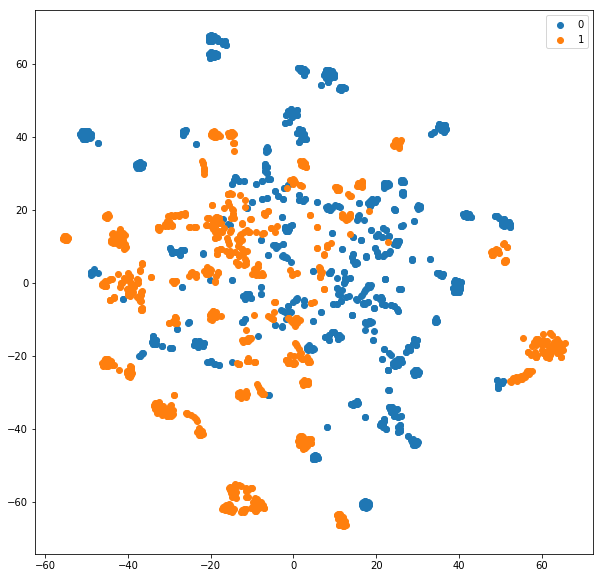

In [98]:

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=20)
pca_result = pca.fit_transform(data[:,:-1])
print('Variance PCA: {}'.format(np.sum(pca.explained_variance_ratio_)))
##Variance PCA: 0.993621154832802

#Run T-SNE on the PCA features.
tsne = TSNE(n_components=2, verbose = 1)
tsne_results = tsne.fit_transform(pca_result)



from keras.utils import np_utils
import matplotlib.pyplot as plt
%matplotlib inline

y_test_cat = np_utils.to_categorical(data[:,-1:], num_classes = 2)
color_map = np.argmax(y_test_cat, axis=1)
plt.figure(figsize=(10,10))
for cl in range(2):
    indices = np.where(color_map==cl)
    indices = indices[0]
    plt.scatter(tsne_results[indices,0], tsne_results[indices, 1], label=cl)
plt.legend()
plt.show()